In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'C:\Users\rajan\Downloads\Documents\Internshala Training\cats_and_dogs\train'
validation_dir = r'C:\Users\rajan\Downloads\Documents\Internshala Training\cats_and_dogs\validation'
test_dir =r'C:\Users\rajan\Downloads\Documents\Internshala Training\cats_and_dogs\test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 84s 836ms/step - loss: 0.6974 - acc: 0.5270 - val_loss: 0.6810 - val_acc: 0.5400
Epoch 2/20
100/100 [==============================] - 59s 589ms/step - loss: 0.6647 - acc: 0.5950 - val_loss: 0.6476 - val_acc: 0.6190
Epoch 3/20
100/100 [==============================] - 59s 593ms/step - loss: 0.6268 - acc: 0.6575 - val_loss: 0.6246 - val_acc: 0.6710
Epoch 4/20
100/100 [==============================] - 59s 586ms/step - loss: 0.5785 - acc: 0.7005 - val_loss: 0.5951 - val_acc: 0.6730
Epoch 5/20
100/100 [==============================] - 58s 579ms/step - loss: 0.5368 - acc: 0.7420 - val_loss: 0.6172 - val_acc: 0.6720
Epoch 6/20
100/100 [==============================] - 62s 621ms/step - loss: 0.5052 - acc: 0.7510 - val_loss: 0.5623 - val_acc: 0.6970
Epoch 7/20
100/100 [==============================] - 59s 588ms/step - loss: 0.4739 - acc: 0.7795 - val_loss: 0.60

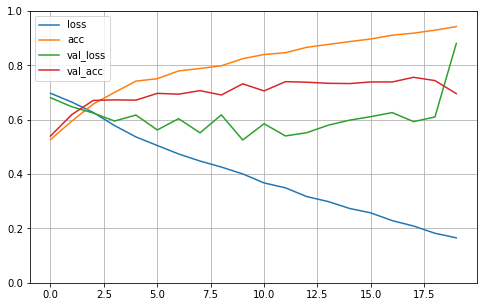

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.save("model.h5")

In [13]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=62.5,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
63/62 [==============================] - 70s 1s/step - loss: 0.6948 - acc: 0.5080 - val_loss: 0.6993 - val_acc: 0.5000
Epoch 2/100
63/62 [==============================] - 70s 1s/step - loss: 0.6905 - acc: 0.5255
Epoch 3/100
63/62 [==============================] - 61s 973ms/step - loss: 0.6750 - acc: 0.5670
Epoch 4/100
63/62 [==============================] - 62s 977ms/step - loss: 0.6707 - acc: 0.5765
Epoch 5/100
63/62 [==============================] - 64s 1s/step - loss: 0.6656 - acc: 0.5900
Epoch 6/100
63/62 [==============================] - 60s 952ms/step - loss: 0.6537 - acc: 0.5990
Epoch 7/100
63/62 [==============================] - 55s 879ms/step - loss: 0.6385 - acc: 0.6285
Epoch 8/100
63/62 [==============================] - 55s 876ms/step - loss: 0.6293 - acc: 0.6400
Epoch 9/100
63/62 [==============================] - 56s 882ms/step - loss: 0.6214 - acc: 0.6535
Epoch 10/100
63/62 [==============================] - 56s 893ms/step - loss: 0.6190 - acc: 0.6410
E

In [17]:
model.save("project_cnn.h5")

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

ValueError: All arrays must be of the same length

In [ ]:
keras.backend.clear_session
del model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [ ]:
conv_base.summary()

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
hist_df = pd.DataFrame(history.history) 

In [ ]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

In [ ]:
model.evaluate(test_generator, steps=50)